# Example 2 - Part 3
## pH-Rate Profile Example - Kirby 2002

Tony Kirby is one of the giants of physical organic and bio-organic chemistry. In this paper he follows up on a decades-long series of papers investigating the mechanism of *amylases* that catalyze the hydrolysis of acetal groups in polysaccharide chains.

This *Python* notebook will plot the integrated rate equations that were used in the paper. As you now know the equation 3 in the paper is incorrect. **Here we will derive the correct equation.**

``Concerted general acid and nucleophilic catalysis of acetalhydrolysis. A simple model for the lysozyme mechanism''. K.E.S. Deana, A.J. Kirby, *J. Chem. Soc., Perkin Trans. 2*, **2002**, 428-432. https://doi.org/10.1039/B110948K. 


## A Consecutive Reaction

For a consecutive reaction of the form...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} $$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

...we can easily derive the integrated rate equations that describe the concentrations of all three species over time. These are available in any physical chemistry book (and are also derived using *Python* code is the latter part of this notebook) and are presented below...

$$
\begin{align}
\left[ \text{A} \right]_t &= \left[ \text{A} \right]_0 e^{-k_1 t} \\
\left[I \right]_t &= \left[ \text{A} \right]_0 \frac{ k_{1} }{k_1 - k_2}\left( e^{- k_2 t} - e^{- k_1 t}\right) \\
\left[P \right]_t &= \left[ \text{A} \right]_0 \left( \left( 1 -  e^{- k_1 t} \right) - \frac{k_1}{k_1 - k_2} \left( e^{- k_2 t} - e^{- k_1 t} \right) \right)
\end{align}
$$


## Deriving the Equations

the reaction in Kirby's system is described as...


$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

This system is very similar to the simple consecutive reaction above with the additional fact that the product (P) is produced in two separate events. P will appear as part of a first-order reaction in the first step. It will also appear as a aproduct of a consecutive reaction in the second step. So the amount of product will be the sum of the two processes.

$$
\begin{align}
\left[P \right]_t &= \left[ \text{A} \right]_0\left(1-e^{-k1 t}\right)\text{ and } \\
\left[P \right]_t &= \left[ \text{A} \right]_0 \left( \left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)
\end{align}
$$

Adding the two amounts of P produced will get the equation that describes P vs time.
$$
\left[P \right]_t = \left[ \text{A} \right]_0\left(1-e^{-k1 t}\right) + \left[ \text{A} \right]_0 \left( \left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right) 
$$

...which simplifies to give...
$$
\left[P \right]_t = \left[ \text{A} \right]_0 \left( 2 \left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right) 
$$



Below is *Python* code that creates the equation that describes absorbance vs time for the reaction. This is the correct version of eq. 3 from the paper.

$$\text{Abs} = \text{Abs}_0 e^{-k_1 t}
             + \frac{\epsilon_I}{\epsilon_A}\text{Abs}_0\frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t} \right)
             + \frac{\epsilon_P}{\epsilon_A}\text{Abs}_0\left[ 2 - 2 e^{-k_1 t} - \frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t}\right) \right]$$

We will separate this equation into the components for the absorbance for each of the three species and then add them all together to get the total absorbance. This will allow us to plot the absorbance due to each species along with the combined total.

*Note: The code below is identical to that on the previous notebook. All I did was fix the term for `Pt_expr` and the rest took care of itself.*

In [3]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# create math symbols for the equations
t = sym.symbols('t')     
t, k1, k2, A0 = sym.symbols('t k1 k2 A_0') 
eA, eI, eP = sym.symbols(r'\epsilon_A \epsilon_I \epsilon_P')
At, It, Pt = sym.symbols('A_t, I_t, P_t') 
Abs0, AbsA, AbsI, AbsP = sym.symbols('Abs_0, Abs_A, Abs_I, Abs_P')
Abst = sym.Symbol('Abs_t')    

# create expressions that define the concentrations of reactants and products
A0_expr = Abs0/eA
At_expr = A0 * sym.exp(-k1 * t)
It_expr = A0 * k1/(k2-k1) * (sym.exp(-k1*t)-sym.exp(-k2*t))
Pt_expr = A0 * (2 - 2*sym.exp(-k1 * t) - k1/(k2-k1) * (sym.exp(-k1*t)-sym.exp(-k2*t)))

#display(At_expr, It_expr, Pt_expr)

# Create expressions for absorbance due to each species in terms of Abs(t=0)
AbsA_expr = eA * At
AbsI_expr = eI * It
AbsP_expr = eP * Pt

#substitute expressions for Absorbance into expressions for concentration
AbsA_expr = AbsA_expr.subs({At: At_expr})
AbsI_expr = AbsI_expr.subs({It: It_expr})
AbsP_expr = AbsP_expr.subs({Pt: Pt_expr})

#display(AbsA_expr, AbsI_expr, AbsP_expr)

AbsA_expr = AbsA_expr.subs({A0: A0_expr})
AbsI_expr = AbsI_expr.subs({A0: A0_expr})
AbsP_expr = AbsP_expr.subs({A0: A0_expr})
Abst_expr = AbsA_expr + AbsI_expr + AbsP_expr
display(sym.Eq(AbsA,AbsA_expr), 
        sym.Eq(AbsI,AbsI_expr), 
        sym.Eq(AbsP,AbsP_expr), 
        sym.Eq(Abst,Abst_expr))



Eq(Abs_A, Abs_0*exp(-k1*t))

Eq(Abs_I, Abs_0*\epsilon_I*k1*(-exp(-k2*t) + exp(-k1*t))/(\epsilon_A*(-k1 + k2)))

Eq(Abs_P, Abs_0*\epsilon_P*(-k1*(-exp(-k2*t) + exp(-k1*t))/(-k1 + k2) + 2 - 2*exp(-k1*t))/\epsilon_A)

Eq(Abs_t, Abs_0*exp(-k1*t) + Abs_0*\epsilon_I*k1*(-exp(-k2*t) + exp(-k1*t))/(\epsilon_A*(-k1 + k2)) + Abs_0*\epsilon_P*(-k1*(-exp(-k2*t) + exp(-k1*t))/(-k1 + k2) + 2 - 2*exp(-k1*t))/\epsilon_A)

Examine the equations for AbsA, AbsI, AbsP and AbsT and convince
yourself that they are the same as in the paper.


## Plotting the Model

Examine the equations for AbsA, AbsI, AbsP and AbsT and convince yourself that they are correct. Using these equations, let us plot the absorbance for $Abs_A$, $Abs_I$, $Abs_P$, and $Abs_t$. We will use values for $k_1$ and $k_2$ from the data in figure 1. The relative values of $Abs_0$, $\epsilon_A$, $\epsilon_I$,, and $\epsilon_P$ are guesstimates (the author did not provide this data.)

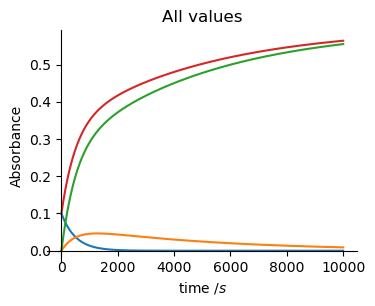

In [5]:
## Plot the function for Abst and its components

time = np.linspace(0,10000,100)  # 100 data points between 0 and 1E5 seconds
k1_value = 2E-3
k2_value = 2E-4
Abs0_value = 0.1
eA_value = 1       # use ratio so that eI/eA = 0.6 for example
eI_value = 0.6
eP_value = 3

# Create dictionaries contains substitution for each term
subs_dict_At = { 
                k1: k1_value, 
                Abs0: Abs0_value
                }
subs_dict_It = {
                k1: k1_value,
                k2: k2_value,
                Abs0: Abs0_value,
                eA: eA_value,
                eI: eI_value,
                }
subs_dict_Pt = {
                k1: k1_value,
                k2: k2_value,
                Abs0: Abs0_value,
                eA: eA_value,
                eP: eP_value,
                }
subs_dict_Abst = {
                  k1: k1_value,
                  k2: k2_value,
                  Abs0: Abs0_value,
                  eA: eA_value,
                  eI: eI_value,
                  eP: eP_value,
                  }

# plot each term using the values established above
t_range = [t,0,10000]
p1 = sym.plot(AbsA_expr.subs(subs_dict_At),t_range, show=False)
p2 = sym.plot(AbsI_expr.subs(subs_dict_It),t_range, show=False)
p3 = sym.plot(AbsP_expr.subs(subs_dict_Pt),t_range, show=False)
p4 = sym.plot(Abst_expr.subs(subs_dict_Abst),t_range, show=False)

p1.extend(p2)   # add all plots to p1
p1.extend(p3)
p1.extend(p4)

# Outout the combined plot

p1.size = [4,3]           # display settings for p1
p1.xlabel = r"time $/s$"
p1.ylabel = r"Absorbance"

p1.title="All values"
p1.ylim = [None,None]
p1.save("p1_2.pdf")   # save and show p1
#p1.show()          # show p1



## Conclusions

We can see that the equation used in the paper gived nonsensical results with the absorbance due to the product, P, going into extremely negative values. This is impossible. When looking only in the positive region we see expected behaviour for the absorbance due to A and I.

This equation has an error. You will need to derive the correct equation and then modify this *Python* notebook to check it. It seems that the term for $Abs_P$ is the source of the error.